In [14]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

In [15]:
meta_data_df = pd.read_csv('user_metadata.csv')
meta_data_df

,user_id,registration_country,registration_region,registration_lat,registration_lng,timezone,registered_at,first_seen_at,acquisition_source
0,8e6fa8be-bc27-40b7-8e37-f85e706a4a79,US,MI,42.808361,-85.143120,NaN,2025-10-08 17:00:31,NaN,google-ads
1,f3ebdaaf-470c-4964-8a08-0b20174d4b04,CA,ON,43.010880,-81.277458,NaN,2025-10-15 16:44:55,NaN,google-ads
2,4b7a49f9-27b8-44a7-bfd3-3e64815a6ebe,US,CA,34.047600,-118.292267,NaN,2024-11-10 05:45:27,NaN,a10
3,e8722f11-ad5d-4911-8798-240e8e2e7503,US,PA,40.429089,-75.346222,NaN,2025-10-02 02:47:05,NaN,NaN
4,7cdf5b27-914c-42be-8753-46ae17f148a1,US,NH,43.230541,-71.547981,NaN,2023-05-05 07:18:53,2023-05-05 07:14:19,NaN
...,...,...,...,...,...,...,...,...,...
30663,9e1370cd-732d-4fd6-83f2-b9aa97565eff,US,NC,35.912022,-79.061478,NaN,2025-05-22 17:35:51,2025-05-22 17:32:51,Dotdash
30664,f02e0b11-f317-4582-8d5d-1506efe12b03,GU,MA,13.468600,144.798904,NaN,2022-04-21 13:11:33,NaN,a10
30665,0f8aef24-191f-4118-a50f-ab0b2a467ea1,US,PA,39.992668,-75.141502,NaN,2025-08-14 13:55:09,2025-08-14 13:53:49,NaN
30666,12a262a2-b8c9-41e3-be1a-70c2daab8923,US,NC,34.928001,-80.745003,NaN,2024-09-06 21:47:57,NaN,enrollment


In [16]:
meta_data_df['registration_lat'] = pd.to_numeric(
    meta_data_df['registration_lat'], errors='coerce'
)
meta_data_df['registration_lng'] = pd.to_numeric(
    meta_data_df['registration_lng'], errors='coerce'
)

In [17]:
heat_map_data_df = meta_data_df.dropna(
    subset=['registration_lat', 'registration_lng']
)

In [18]:
heat_data = heat_map_data_df[
    ['registration_lat', 'registration_lng']
].values.tolist()

In [19]:
center_lat = heat_map_data_df['registration_lat'].mean()
center_lon = heat_map_data_df['registration_lng'].mean()

In [20]:
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=10
)

In [21]:
HeatMap(
    heat_data,
    radius=15,
    blur=20,
    max_zoom=13
).add_to(m) 

display(m)

In [22]:
meta_data_df

# Example column names (change if needed)
meta_data_df["registered_at"] = pd.to_datetime(meta_data_df["registered_at"])
meta_data_df["first_seen_at"] = pd.to_datetime(meta_data_df["first_seen_at"])

# Duration in days
meta_data_df["time_to_register"] = (meta_data_df["registered_at"] - meta_data_df["first_seen_at"]).dt.days


In [23]:
low = meta_data_df["time_to_register"].quantile(0.01)
high = meta_data_df["time_to_register"].quantile(0.99)

In [24]:
filtered = meta_data_df[
    (meta_data_df["time_to_register"] >= low) &
    (meta_data_df["time_to_register"] <= high)
]

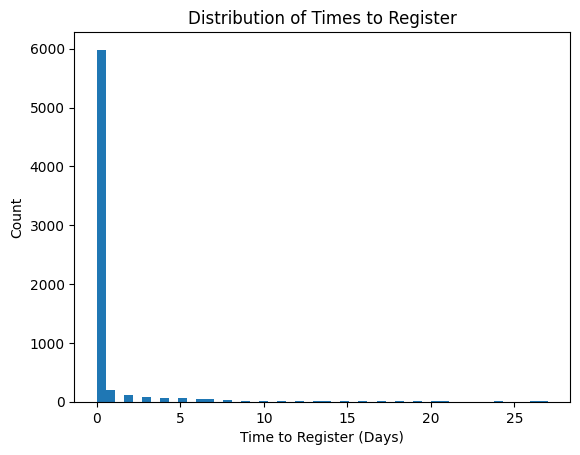

In [25]:
plt.figure()
plt.hist(filtered["time_to_register"], bins=50)
plt.xlabel("Time to Register (Days)")
plt.ylabel("Count")
plt.title("Distribution of Times to Register")
plt.show()